In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import pandas as pd 

In [2]:
# Part 1 ThermoCouple T Calibration 
## Step 1: Pyrometer Calibration
import os 
cwd = os.getcwd()
os.chdir("/Users/jackcarter/Desktop/Downloads")
df1 = pd.read_csv("PyroApril2018.csv")
c1 = df1.iloc[:,0:1]
c2 = df1.iloc[:,1:2]
x1 = c1.values
x2 = c2.values
x1 = x1[x1 >=0]
x2 = x2[x2 >=0]
ThermoT = x2
PyroT = x1
zpt = np.polyfit(x1,x2,3)

In [3]:
font = {"family": "Arial", 
       "weight": "normal", 
       "size": 16}

plt.rc("font", **font)

In [4]:
cwd = os.chdir('/Users/jackcarter/Blind_Mixture_Data')

# Mixture 1 

In [5]:
df1 = pd.read_csv("jc_unmix_1.csv")

In [6]:
df1.head()

,Age,Age_err,Ar40_,ar39,Pyrometer Temperature,Time,ar39_err
0,514.4398,4.326184,0.952051,0.031714,487,3000,0.000052
1,497.7674,1.960810,1.426260,0.057235,521,3000,0.000041
2,504.5527,1.321338,0.920547,0.037670,521,3000,0.000040
3,462.6310,0.480155,5.396322,0.241565,579,3000,0.000087
4,464.5485,3.191597,0.378192,0.016453,579,3000,0.000036


In [7]:
cwd = os.chdir('/Users/jackcarter/Documents/Data_Mixtures')
df_arr = pd.read_csv('BlindMixture39ArData_mix1.csv', engine = 'python')

In [8]:
age_mix1 = df1['Age'].values
age_mix1_err = df1['Age_err'].values
ar39_mix1 = df1['ar39'].values
da2 = df_arr['D/a^2'].values
da2_err = df_arr['del D/a^2'].values
da2_err = da2_err[~np.isnan(da2_err)]
temp = df_arr['Temp (deg. C)'].values
time_mix1 = df_arr['Duration (s)'].values
da2_err
da2 = da2[:-1]
tempk = temp[:-1] + 273.15

temp_mix1 = tempk[:-2]
tempk.shape[0]
da2_mix1 = da2[:-2]

In [9]:
# Cumulative Sum
def crel(x): 
    y = np.cumsum(x)
    z = y/y[-1]
    return z

In [10]:
crel_mix1 = crel(ar39_mix1)

In [11]:
# Plotting Age spectra 
crel_mix1_plot = np.insert(crel_mix1, 0, 0)
age_mix1_plot = np.insert(age_mix1, 0, age_mix1[0])
age_mix1_err_plot = np.insert(age_mix1_err, 0, age_mix1_err[0])

Text(0, 0.5, 'Apparent Age (Ma)')

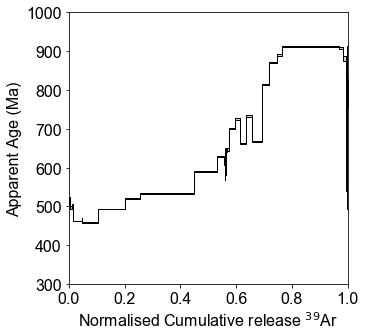

In [12]:
# Age spectra
plt.figure(figsize = (5,5))
plt.fill_between(crel_mix1_plot, 
                age_mix1_plot - 2*age_mix1_err_plot, 
                age_mix1_plot + 2*age_mix1_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
plt.xlim(0,1)
plt.ylim(300, 1000)
plt.xlabel('Normalised Cumulative release $^{39}$Ar')
plt.ylabel('Apparent Age (Ma)')

Text(0.5, 0, '10000/T (K$^{-1}$)')

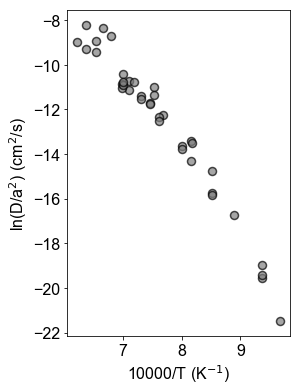

In [13]:
# Arrhenius Data
tplot_mix1 = 10000/(temp_mix1 + 273.15)

plt.figure(figsize = (4,6))
plt.plot(tplot_mix1, np.log(da2_mix1),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

plt.ylabel('ln(D/a$^{2}$) (cm$^{2}$/s)')
plt.xlabel('10000/T (K$^{-1}$)')

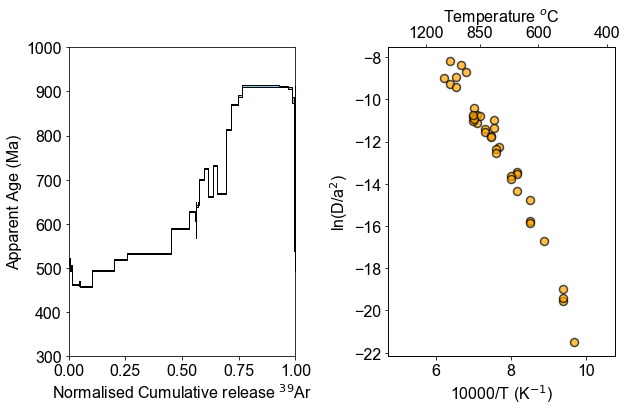

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (9,6))
ax[0].fill_between(crel_mix1_plot, 
                age_mix1_plot - 2*age_mix1_err_plot, 
                age_mix1_plot + 2*age_mix1_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'skyblue', alpha = 1)
ax[0].set_xlim(0,1)
ax[0].set_ylim(300, 1000)
ax[0].set_xlabel('Normalised Cumulative release $^{39}$Ar')
ax[0].set_ylabel('Apparent Age (Ma)')



ax[1].plot(tplot_mix1, np.log(da2_mix1),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'orange', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

ax[1].set_ylabel('ln(D/a$^{2}$)')
ax[1].set_xlabel('10000/T (K$^{-1}$)')



#### Temp #####

ax2 = ax[1].twiny()

Tdc = np.array([400,  600, 850, 1200])
Tp = 10e3/(Tdc + 273.15 + 273.15)
labels = list(['400', '600', '850', '1200'])
ax2.plot(tplot_mix1,np.log(da2_mix1), alpha = 0)
ax[1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

ax2.set_xlabel('Temperature $^{o}$C')

plt.tight_layout()
plt.savefig('mixture1_chp3.pdf')

# Mixture 2

In [15]:
cwd = os.chdir('/Users/jackcarter/Blind_Mixture_Data')
df2 = pd.read_csv('jc_unmix_2_data.csv', engine = 'python')

In [16]:
df2.head()

,Age,Age_Er,Ar40_,Ar40_Er,Ar39_,Ar39_Er,Pwr_Achieved,Dur_Heating_At_Req_Pwr,temp,temp_err,time,Run_Date
0,909.67610,27.47325,0.231024,0.000610,0.002113,0.000020,360,2997,364.00,7.00,2996.600,5/24/2018
1,556.15770,123.23740,0.012567,0.000083,0.000489,0.000019,360,1996,366.00,6.29,2996.600,5/24/2018
2,555.46210,65.31143,0.022470,0.000089,0.000766,0.000022,390,1997,393.44,4.95,1996.440,5/25/2018
3,304.49150,32.98476,0.059312,0.000140,0.002095,0.000019,420,1996,422.50,3.56,1996.497,5/25/2018
4,78.52362,61.55755,0.030510,0.000100,0.001179,0.000025,420,1997,422.53,3.99,1996.014,5/25/2018


In [17]:
age_mix2 = df2['Age'].values
age_mix2_err = df2['Age_Er'].values
ar39_mix2 = df2['Ar39_'].values


In [18]:
cwd = os.chdir('/Users/jackcarter/Documents/Data_Mixtures')
df_arr = pd.read_csv('BlindMixture39ArData_mix2.csv', engine = 'python')

In [19]:
da2 = df_arr['D/a^2'].values
da2_err = df_arr['del D/a^2'].values
da2_err = da2_err[~np.isnan(da2_err)]
temp = df_arr['Temp (deg. C)'].values
time_mix2 = df_arr['Duration (s)'].values
da2_err
da2 = da2[:-1]
tempk = temp[:-1] + 273.15

temp_mix2 = tempk
tempk.shape[0]
da2_mix2 = da2

In [20]:
crel_mix2 = crel(ar39_mix2)

# Plotting Age spectra 
crel_mix2_plot = np.insert(crel_mix2, 0, 0)
age_mix2_plot = np.insert(age_mix2, 0, age_mix2[0])
age_mix2_err_plot = np.insert(age_mix2_err, 0, age_mix2_err[0])

Text(0, 0.5, 'Apparent Age (Ma)')

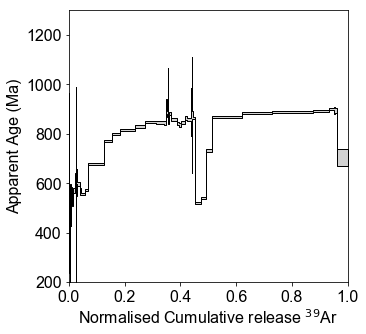

In [21]:
# Age spectra
plt.figure(figsize = (5,5))
plt.fill_between(crel_mix2_plot, 
                age_mix2_plot - 2*age_mix2_err_plot, 
                age_mix2_plot + 2*age_mix2_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
plt.xlim(0,1)
plt.ylim(200, 1300)
plt.xlabel('Normalised Cumulative release $^{39}$Ar')
plt.ylabel('Apparent Age (Ma)')

Text(0.5, 0, '10000/T (K$^{-1}$)')

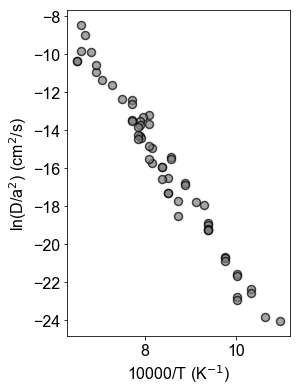

In [22]:
# Arrhenius Data 
tplot_mix2 = 10000/(temp_mix2 + 273.15)

plt.figure(figsize = (4,6))
plt.plot(tplot_mix2, np.log(da2_mix2),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

plt.ylabel('ln(D/a$^{2}$) (cm$^{2}$/s)')
plt.xlabel('10000/T (K$^{-1}$)')

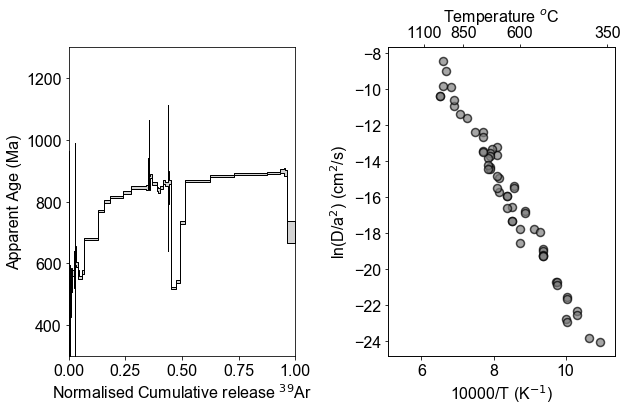

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (9,6))
ax[0].fill_between(crel_mix2_plot,
                age_mix2_plot - 2*age_mix2_err_plot, 
                age_mix2_plot + 2*age_mix2_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
ax[0].set_xlim(0,1)
ax[0].set_ylim(300, 1300)
ax[0].set_xlabel('Normalised Cumulative release $^{39}$Ar')
ax[0].set_ylabel('Apparent Age (Ma)')



ax[1].plot(tplot_mix2, np.log(da2_mix2),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

ax[1].set_ylabel('ln(D/a$^{2}$) (cm$^{2}$/s)')
ax[1].set_xlabel('10000/T (K$^{-1}$)')



#### Temp #####

ax2 = ax[1].twiny()

Tdc = np.array([350,  600, 850,  1100])
Tp = 10e3/(Tdc + 273.15 + 273.15)
labels = list(['350', '600', '850',   
              '1100'])
ax2.plot(tplot_mix2,np.log(da2_mix2), alpha = 0)
ax[1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

ax2.set_xlabel('Temperature $^{o}$C')

plt.tight_layout()

# Mixture 3

In [24]:
cwd = os.chdir('/Users/jackcarter/Blind_Mixture_Data')
df3 = pd.read_csv('jc_unmix_4_data.csv', engine = 'python')

age_mix3 = df3['Age'].values
age_mix3_err = df3['Age_Er'].values
ar39_mix3 = df3['Ar39_'].values


In [25]:
cwd = os.chdir('/Users/jackcarter/Documents/Data_Mixtures')
df_arr = pd.read_csv('BlindMixture39ArData_mix4.csv', engine = 'python')

In [26]:

da2 = df_arr['D/a^2'].values
da2_err = df_arr['del D/a^2'].values
da2_err = da2_err[~np.isnan(da2_err)]
temp = df_arr['Temp (deg. C)'].values
time_mix3 = df_arr['Duration (s)'].values
da2_err
da2 = da2[:-1]
tempk = temp[:-1] + 273.15

temp_mix3 = tempk
tempk.shape[0]
da2_mix3 = da2

In [27]:
crel_mix3 = crel(ar39_mix3)

# Plotting Age spectra 
crel_mix3_plot = np.insert(crel_mix3, 0, 0)
age_mix3_plot = np.insert(age_mix3, 0, age_mix3[0])
age_mix3_err_plot = np.insert(age_mix3_err, 0, age_mix3_err[0])

Text(0, 0.5, 'Apparent Age (Ma)')

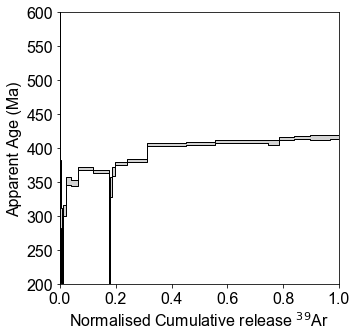

In [28]:
# Age spectra
plt.figure(figsize = (5,5))
plt.fill_between(crel_mix3_plot, 
                age_mix3_plot - 2*age_mix3_err_plot, 
                age_mix3_plot + 2*age_mix3_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
plt.xlim(0,1)
plt.ylim(200, 600)
plt.xlabel('Normalised Cumulative release $^{39}$Ar')
plt.ylabel('Apparent Age (Ma)')

Text(0.5, 0, '10000/T (K$^{-1}$)')

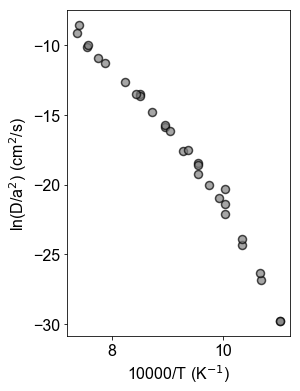

In [29]:
# Arrhenius Data 
tplot_mix3 = 10000/(temp_mix3 + 273.15)

plt.figure(figsize = (4,6))
plt.plot(tplot_mix3, np.log(da2_mix3),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

plt.ylabel('ln(D/a$^{2}$) (cm$^{2}$/s)')
plt.xlabel('10000/T (K$^{-1}$)')

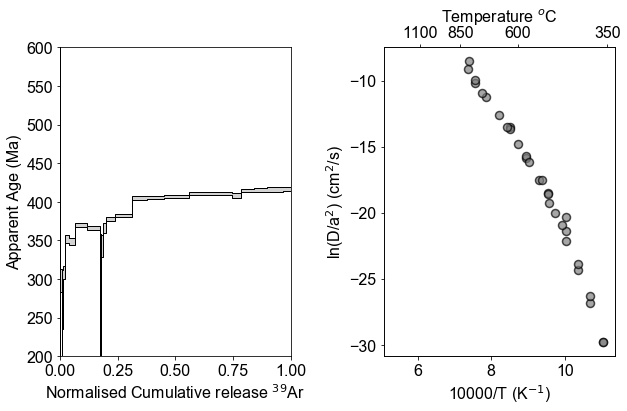

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (9,6))
ax[0].fill_between(crel_mix3_plot,
                age_mix3_plot - 2*age_mix3_err_plot, 
                age_mix3_plot + 2*age_mix3_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
ax[0].set_xlim(0,1)
ax[0].set_ylim(200, 600)
ax[0].set_xlabel('Normalised Cumulative release $^{39}$Ar')
ax[0].set_ylabel('Apparent Age (Ma)')



ax[1].plot(tplot_mix3, np.log(da2_mix3),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

ax[1].set_ylabel('ln(D/a$^{2}$) (cm$^{2}$/s)')
ax[1].set_xlabel('10000/T (K$^{-1}$)')



#### Temp #####

ax2 = ax[1].twiny()

Tdc = np.array([350,  600, 850,  1100])
Tp = 10e3/(Tdc + 273.15 + 273.15)
labels = list(['350', '600', '850',   
              '1100'])
ax2.plot(tplot_mix3,np.log(da2_mix3), alpha = 0)
ax[1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

ax2.set_xlabel('Temperature $^{o}$C')

plt.tight_layout()

# Mixture 4

In [31]:
cwd = os.chdir('/Users/jackcarter/Blind_Mixture_Data')
df4 = pd.read_csv('jc_unmix_5_data.csv', engine = 'python')

age_mix4 = df4['Age'].values
age_mix4_err = df4['Age_Er'].values
ar39_mix4 = df4['Ar39_'].values


In [32]:
cwd = os.chdir('/Users/jackcarter/Documents/Data_Mixtures')
df_arr = pd.read_csv('BlindMixture39ArData_mix5.csv', engine = 'python')

In [33]:
da2 = df_arr['D/a^2'].values
da2_err = df_arr['del D/a^2'].values
da2_err = da2_err[~np.isnan(da2_err)]
temp = df_arr['Temp (deg. C)'].values
time_mix4 = df_arr['Duration (s)'].values
da2_err
da2 = da2[:-1]
tempk = temp[:-1] + 273.15

temp_mix4 = tempk
tempk.shape[0]
da2_mix4 = da2

In [34]:
crel_mix4 = crel(ar39_mix4)

# Plotting Age spectra 
crel_mix4_plot = np.insert(crel_mix4, 0, 0)
age_mix4_plot = np.insert(age_mix4, 0, age_mix4[0])
age_mix4_err_plot = np.insert(age_mix4_err, 0, age_mix4_err[0])

Text(0, 0.5, 'Apparent Age (Ma)')

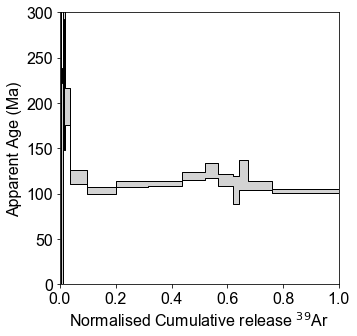

In [35]:
# Age spectra
plt.figure(figsize = (5,5))
plt.fill_between(crel_mix4_plot, 
                age_mix4_plot - 2*age_mix4_err_plot, 
                age_mix4_plot + 2*age_mix4_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
plt.xlim(0,1)
plt.ylim(0, 300)
plt.xlabel('Normalised Cumulative release $^{39}$Ar')
plt.ylabel('Apparent Age (Ma)')

Text(0.5, 0, '10000/T (K$^{-1}$)')

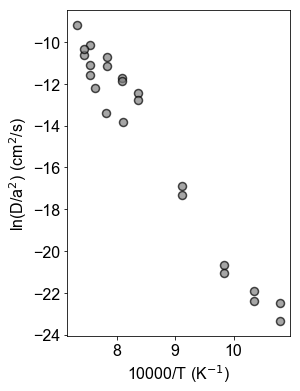

In [36]:
# Arrhenius Data 
tplot_mix4 = 10000/(temp_mix4 + 273.15)

plt.figure(figsize = (4,6))
plt.plot(tplot_mix4, np.log(da2_mix4),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

plt.ylabel('ln(D/a$^{2}$) (cm$^{2}$/s)')
plt.xlabel('10000/T (K$^{-1}$)')

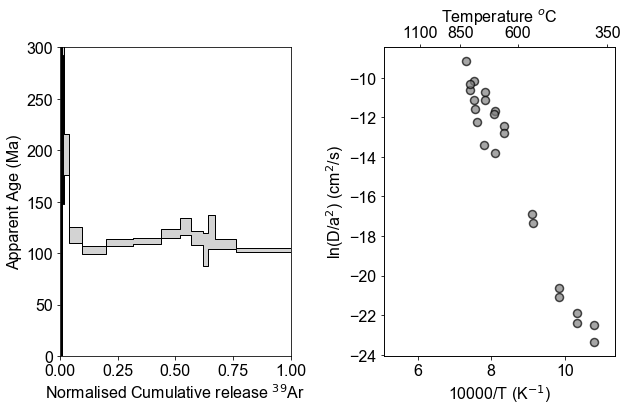

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (9,6))
ax[0].fill_between(crel_mix4_plot,
                age_mix4_plot - 2*age_mix4_err_plot, 
                age_mix4_plot + 2*age_mix4_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
ax[0].set_xlim(0,1)
ax[0].set_ylim(0, 300)
ax[0].set_xlabel('Normalised Cumulative release $^{39}$Ar')
ax[0].set_ylabel('Apparent Age (Ma)')



ax[1].plot(tplot_mix4, np.log(da2_mix4),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

ax[1].set_ylabel('ln(D/a$^{2}$) (cm$^{2}$/s)')
ax[1].set_xlabel('10000/T (K$^{-1}$)')



#### Temp #####

ax2 = ax[1].twiny()

Tdc = np.array([350,  600, 850,  1100])
Tp = 10e3/(Tdc + 273.15 + 273.15)
labels = list(['350', '600', '850',   
              '1100'])
ax2.plot(tplot_mix4,np.log(da2_mix4), alpha = 0)
ax[1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

ax2.set_xlabel('Temperature $^{o}$C')

plt.tight_layout()

# Mixture 5

In [38]:
cwd = os.chdir('/Users/jackcarter/Blind_Mixture_Data')
df5 = pd.read_csv('jc_unmix_6_data.csv', engine = 'python')

age_mix5 = df5['Age'].values
age_mix5_err = df5['Age_Er'].values
ar39_mix5 = df5['Ar39_'].values


In [39]:
cwd = os.chdir('/Users/jackcarter/Documents/Data_Mixtures')
df_arr = pd.read_csv('BlindMixture39ArData_mix6.csv', engine = 'python')

In [40]:
da2 = df_arr['D/a^2'].values
da2_err = df_arr['del D/a^2'].values
da2_err = da2_err[~np.isnan(da2_err)]
temp = df_arr['Temp (deg. C)'].values
time_mix5 = df_arr['Duration (s)'].values
da2_err
da2 = da2[:-1]
tempk = temp[:-1] + 273.15

temp_mix5 = tempk
tempk.shape[0]
da2_mix5 = da2

In [41]:
crel_mix5 = crel(ar39_mix5)

# Plotting Age spectra 
crel_mix5_plot = np.insert(crel_mix5, 0, 0)
age_mix5_plot = np.insert(age_mix5, 0, age_mix5[0])
age_mix5_err_plot = np.insert(age_mix5_err, 0, age_mix5_err[0])

Text(0, 0.5, 'Apparent Age (Ma)')

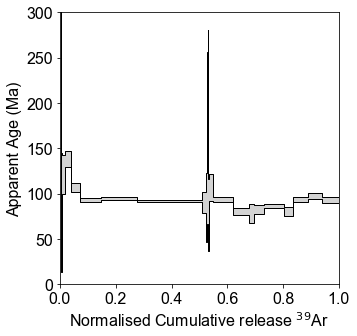

In [42]:
# Age spectra
plt.figure(figsize = (5,5))
plt.fill_between(crel_mix5_plot, 
                age_mix5_plot - 2*age_mix5_err_plot, 
                age_mix5_plot + 2*age_mix5_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
plt.xlim(0,1)
plt.ylim(0, 300)
plt.xlabel('Normalised Cumulative release $^{39}$Ar')
plt.ylabel('Apparent Age (Ma)')

Text(0.5, 0, '10000/T (K$^{-1}$)')

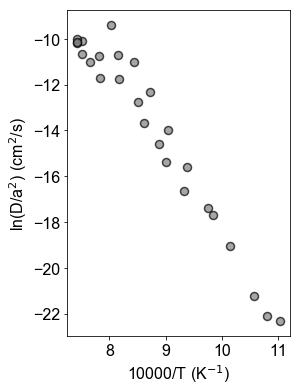

In [43]:
# Arrhenius Data 
tplot_mix5 = 10000/(temp_mix5 + 273.15)

plt.figure(figsize = (4,6))
plt.plot(tplot_mix5, np.log(da2_mix5),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

plt.ylabel('ln(D/a$^{2}$) (cm$^{2}$/s)')
plt.xlabel('10000/T (K$^{-1}$)')

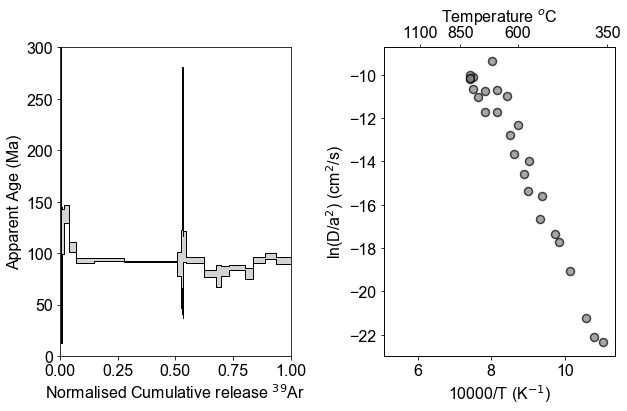

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (9,6))
ax[0].fill_between(crel_mix5_plot,
                age_mix5_plot - 2*age_mix5_err_plot, 
                age_mix5_plot + 2*age_mix5_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
ax[0].set_xlim(0,1)
ax[0].set_ylim(0, 300)
ax[0].set_xlabel('Normalised Cumulative release $^{39}$Ar')
ax[0].set_ylabel('Apparent Age (Ma)')



ax[1].plot(tplot_mix5, np.log(da2_mix5),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

ax[1].set_ylabel('ln(D/a$^{2}$) (cm$^{2}$/s)')
ax[1].set_xlabel('10000/T (K$^{-1}$)')



#### Temp #####

ax2 = ax[1].twiny()

Tdc = np.array([350,  600, 850,  1100])
Tp = 10e3/(Tdc + 273.15 + 273.15)
labels = list(['350', '600', '850',   
              '1100'])
ax2.plot(tplot_mix5,np.log(da2_mix5), alpha = 0)
ax[1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

ax2.set_xlabel('Temperature $^{o}$C')

plt.tight_layout()

In [45]:
temp_mix2 = np.polyval(zpt,temp_mix2)
temp_mix3 = np.polyval(zpt,temp_mix3)
temp_mix4 = np.polyval(zpt,temp_mix4)
temp_mix5 = np.polyval(zpt,temp_mix5)

# Complete Plot

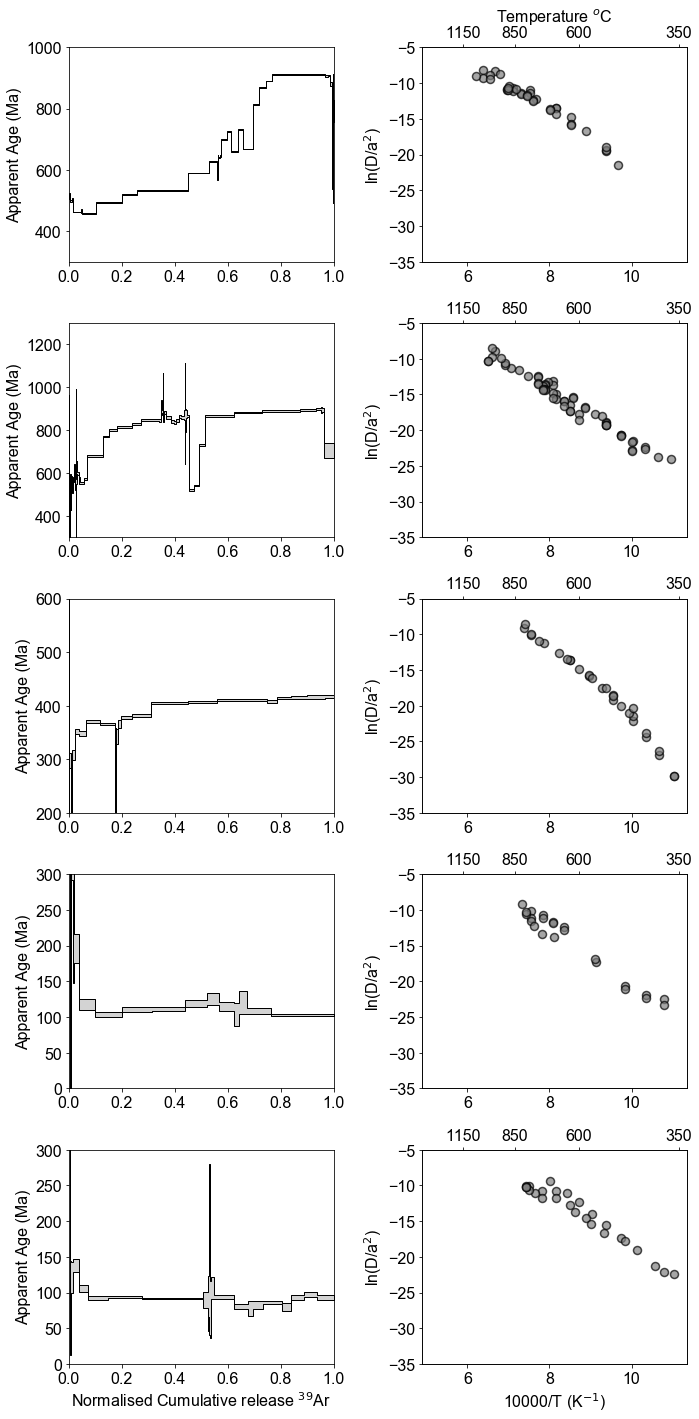

In [46]:
fig, ax = plt.subplots(5, 2, figsize = (10, 20))

ax[0,0].fill_between(crel_mix1_plot, 
                age_mix1_plot - 2*age_mix1_err_plot, 
                age_mix1_plot + 2*age_mix1_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
ax[0,0].set_xlim(0,1)
ax[0,0].set_ylim(300, 1000)
ax[4,0].set_xlabel('Normalised Cumulative release $^{39}$Ar')
ax[0,0].set_ylabel('Apparent Age (Ma)')



ax[0,1].plot(tplot_mix1, np.log(da2_mix1),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

ax[0,1].set_ylabel('ln(D/a$^{2}$)')




#### Temp #####

ax2 = ax[0,1].twiny()

Tdc = np.array([350,  600, 850,  1150])
Tp = 10e3/(Tdc + 273.15 + 273.15)
labels = list(['350', '600', '850',   
              '1150'])
ax2.plot(tplot_mix1,np.log(da2_mix1), alpha = 0)
ax[0,1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

ax2.set_xlabel('Temperature $^{o}$C'); 



ax[1,0].fill_between(crel_mix2_plot,
                age_mix2_plot - 2*age_mix2_err_plot, 
                age_mix2_plot + 2*age_mix2_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
ax[1,0].set_xlim(0,1)
ax[1,0].set_ylim(300, 1300)

ax[1,0].set_ylabel('Apparent Age (Ma)')



ax[1,1].plot(tplot_mix2, np.log(da2_mix2),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

ax[1,1].set_ylabel('ln(D/a$^{2}$)')



#### Temp #####

ax22 = ax[1,1].twiny()

ax22.plot(tplot_mix2,np.log(da2_mix2), alpha = 0)
ax[1,1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax22.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax22.set_xticks(Tp)
ax22.set_xticklabels(labels)



ax[2,0].fill_between(crel_mix3_plot,
                age_mix3_plot - 2*age_mix3_err_plot, 
                age_mix3_plot + 2*age_mix3_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
ax[2,0].set_xlim(0,1)
ax[2,0].set_ylim(200, 600)

ax[2,0].set_ylabel('Apparent Age (Ma)')



ax[2,1].plot(tplot_mix3, np.log(da2_mix3),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

ax[2,1].set_ylabel('ln(D/a$^{2}$)')




#### Temp #####

ax222 = ax[2,1].twiny()


ax222.plot(tplot_mix3,np.log(da2_mix3), alpha = 0)
ax[2,1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax222.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax222.set_xticks(Tp)
ax222.set_xticklabels(labels)



ax[3,0].fill_between(crel_mix4_plot,
                age_mix4_plot - 2*age_mix4_err_plot, 
                age_mix4_plot + 2*age_mix4_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
ax[3,0].set_xlim(0,1)
ax[3,0].set_ylim(0, 300)

ax[3,0].set_ylabel('Apparent Age (Ma)')



ax[3,1].plot(tplot_mix4, np.log(da2_mix4),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

ax[3,1].set_ylabel('ln(D/a$^{2}$)')




#### Temp #####

ax2222 = ax[3,1].twiny()


ax2222.plot(tplot_mix4,np.log(da2_mix4), alpha = 0)
ax[3,1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2222.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2222.set_xticks(Tp)
ax2222.set_xticklabels(labels)



ax[4,0].fill_between(crel_mix5_plot,
                age_mix5_plot - 2*age_mix5_err_plot, 
                age_mix5_plot + 2*age_mix5_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
ax[4,0].set_xlim(0,1)
ax[4,0].set_ylim(0, 300)

ax[4,0].set_ylabel('Apparent Age (Ma)')



ax[4,1].plot(tplot_mix5, np.log(da2_mix5),
         marker = 'o', lw = 0, 
         markersize = 8, 
         markeredgecolor = 'k', 
         markerfacecolor = 'grey', 
         alpha = 0.7, 
         markeredgewidth = 1.5
        )

ax[4,1].set_ylabel('ln(D/a$^{2}$)')
ax[4,1].set_xlabel('10000/T (K$^{-1}$)')



#### Temp #####

ax22222 = ax[4,1].twiny()


ax22222.plot(tplot_mix5,np.log(da2_mix5), alpha = 0)
ax[4,1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax22222.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax22222.set_xticks(Tp)
ax22222.set_xticklabels(labels)


ax[0,1].set_ylim(-35, -5)
ax[0,1].locator_params(axis = 'y', nbins = 6)

ax[1,1].set_ylim(-35, -5)
ax[1,1].locator_params(axis = 'y', nbins = 6)

ax[2,1].set_ylim(-35, -5)
ax[2,1].locator_params(axis = 'y', nbins = 6)

ax[3,1].set_ylim(-35, -5)
ax[3,1].locator_params(axis = 'y', nbins = 6)

ax[4,1].set_ylim(-35, -5)
ax[4,1].locator_params(axis = 'y', nbins = 6)




plt.tight_layout()

plt.savefig('blind_mix_age_arr_plot.pdf')


# Just Age spectra

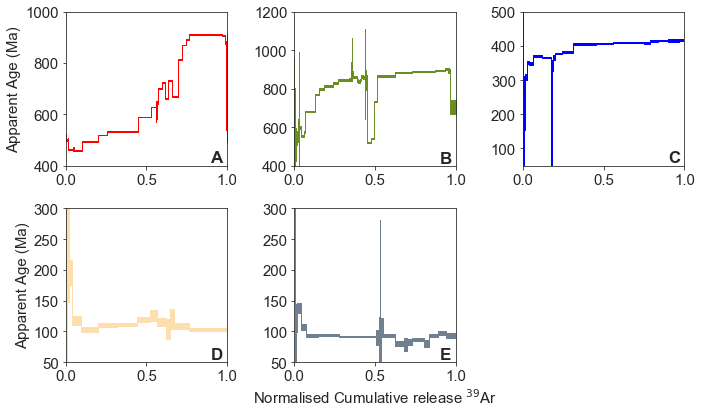

In [53]:
sns.set_style('ticks')
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font) 


fig, ax = plt.subplots(2, 3, figsize= (10, 6))
fig.delaxes(ax[1,2])
ax[0,0].fill_between(crel_mix1_plot, 
                age_mix1_plot - 2*age_mix1_err_plot, 
                age_mix1_plot + 2*age_mix1_err_plot, 
                step = 'pre', 
                interpolate = True, 
                lw = 1, 
                color = 'r',
                     alpha = 1)
ax[0,0].set_xlim(0,1)
ax[0,0].set_ylim(300, 1000)
ax[0,0].set_ylabel('Apparent Age (Ma)')
ax[1,0].set_ylabel('Apparent Age (Ma)')





ax[0,1].fill_between(crel_mix2_plot,
                age_mix2_plot - 2*age_mix2_err_plot, 
                age_mix2_plot + 2*age_mix2_err_plot, 
                step = 'pre', 
                interpolate = True, 
                 lw = 1, 
                color = 'olivedrab', alpha = 1)
ax[0,1].set_xlim(0,1)
ax[0,1].set_ylim(300, 1300)






ax[0,2].fill_between(crel_mix3_plot,
                age_mix3_plot - 2*age_mix3_err_plot, 
                age_mix3_plot + 2*age_mix3_err_plot, 
                step = 'pre', 
                interpolate = True, 
                 lw = 1, 
                color = 'blue', alpha = 1)
ax[0,2].set_xlim(0,1)
ax[0,2].set_ylim(100, 600)






ax[1,0].fill_between(crel_mix4_plot,
                age_mix4_plot - 2*age_mix4_err_plot, 
                age_mix4_plot + 2*age_mix4_err_plot, 
                step = 'pre', 
                interpolate = True, 
                lw = 1, 
                color = 'navajowhite', alpha = 1)
ax[1,0].set_xlim(0,1)
ax[1,0].set_ylim(0, 300)





ax[1,1].fill_between(crel_mix5_plot,
                age_mix5_plot - 2*age_mix5_err_plot, 
                age_mix5_plot + 2*age_mix5_err_plot, 
                step = 'pre', 
                interpolate = True, 
                 lw = 1, 
                color = 'slategray', alpha = 1)
ax[1,1].set_xlim(0,1)
ax[1,1].set_ylim(0, 300)


ax[0,0].set_ylim(400, 1000)
ax[0,1].set_ylim(400, 1200)
ax[0,2].set_ylim(50, 500)
ax[1,0].set_ylim(50, 300)
ax[1,1].set_ylim(50, 300)



ax[1,1].set_xlabel('Normalised Cumulative release $^{39}$Ar')

plt.tight_layout()

s1 = 'A'
s2 = 'B'
s3 = 'C'
s4 = 'D'
s5 = 'E'
ax[0,0].text(0.9, 415, s1, fontweight = 'bold', 
            fontsize= 17)

ax[0,1].text(0.9, 415, s2, fontweight = 'bold', 
            fontsize= 17)


ax[0,2].text(0.9, 60, s3, fontweight = 'bold', 
            fontsize= 17)


ax[1,0].text(0.9, 55, s4, fontweight = 'bold', 
            fontsize= 17)


ax[1,1].text(0.9, 55, s5, fontweight = 'bold', 
            fontsize= 17)
plt.savefig('/Users/jackcarter/Desktop/chp3_figs/Blind_mixture_age_spec_plot.pdf')



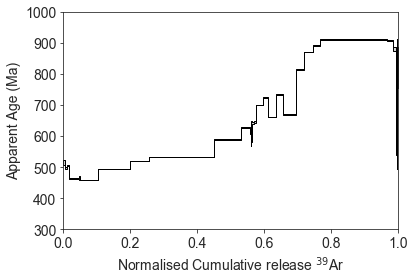

In [49]:
font = {"family": "Arial", 
       "weight": "normal", 
       "size": 14}

plt.rc("font", **font)


plt.fill_between(crel_mix1_plot, 
                age_mix1_plot - 2*age_mix1_err_plot, 
                age_mix1_plot + 2*age_mix1_err_plot, 
                step = 'pre', 
                interpolate = True, 
                edgecolor = 'k', lw = 1, 
                facecolor = 'lightgrey', alpha = 1)
plt.xlim(0,1)
plt.ylim(300, 1000)
plt.ylabel('Apparent Age (Ma)')
plt.xlabel('Normalised Cumulative release $^{39}$Ar')
plt.savefig('Blind_Mixture_example.pdf')

# Just Arrhenius 

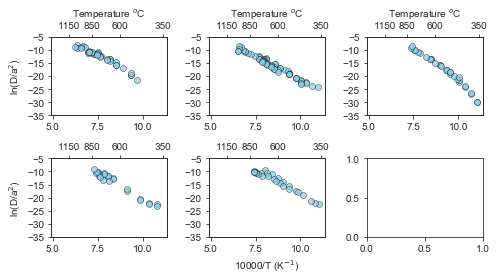

In [50]:
font = {"family": "Arial", 
       "weight": "normal", 
       "size": 10}

plt.rc("font", **font)

fig, ax = plt.subplots(2, 3, figsize = (7,4))

ax[0,0].plot(tplot_mix1, np.log(da2_mix1),
         marker = 'o', lw = 0, 
         markersize = 6, 
         markeredgecolor = 'k', 
         markerfacecolor = 'skyblue', 
         alpha = 0.7, 
         markeredgewidth = 0.5)

ax[0,0].set_ylabel('ln(D/a$^{2}$)')




#### Temp #####

ax2 = ax[0,0].twiny()

Tdc = np.array([350,  600, 850,  1150])
Tp = 10e3/(Tdc + 273.15 + 273.15)
labels = list(['350', '600', '850',   
              '1150'])
ax2.plot(tplot_mix1,np.log(da2_mix1), alpha = 0)
ax[0,0].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)

ax2.set_xlabel('Temperature $^{o}$C'); 





ax[0,1].plot(tplot_mix2, np.log(da2_mix2),
         marker = 'o', lw = 0, 
         markersize = 6, 
         markeredgecolor = 'k', 
         markerfacecolor = 'skyblue', 
         alpha = 0.7, 
         markeredgewidth = .5
        )




#### Temp #####

ax22 = ax[0,1].twiny()

ax22.plot(tplot_mix2,np.log(da2_mix2), alpha = 0)
ax[0,1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax22.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax22.set_xticks(Tp)
ax22.set_xticklabels(labels)




ax[0,2].plot(tplot_mix3, np.log(da2_mix3),
         marker = 'o', lw = 0, 
         markersize = 6, 
         markeredgecolor = 'k', 
         markerfacecolor = 'skyblue', 
         alpha = 0.7, 
         markeredgewidth = .5
        )





#### Temp #####

ax222 = ax[0,2].twiny()


ax222.plot(tplot_mix3,np.log(da2_mix3), alpha = 0)
ax[0,2].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax222.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax222.set_xticks(Tp)
ax222.set_xticklabels(labels)




ax[1,0].plot(tplot_mix4, np.log(da2_mix4),
         marker = 'o', lw = 0, 
         markersize = 6, 
         markeredgecolor = 'k', 
         markerfacecolor = 'skyblue', 
         alpha = 0.7, 
         markeredgewidth = .5
        )

ax[1,0].set_ylabel('ln(D/a$^{2}$)')




#### Temp #####

ax2222 = ax[1,0].twiny()


ax2222.plot(tplot_mix4,np.log(da2_mix4), alpha = 0)
ax[1,0].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax2222.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax2222.set_xticks(Tp)
ax2222.set_xticklabels(labels)




ax[1,1].plot(tplot_mix5, np.log(da2_mix5),
         marker = 'o', lw = 0, 
         markersize = 6, 
         markeredgecolor = 'k', 
         markerfacecolor = 'skyblue', 
         alpha = 0.7, 
         markeredgewidth = .5
        )

ax[1,1].set_xlabel('10000/T (K$^{-1}$)')



#### Temp #####

ax22222 = ax[1,1].twiny()


ax22222.plot(tplot_mix5,np.log(da2_mix5), alpha = 0)
ax[1,1].set_xlim(Tp.min() -1, Tp.max()+ 0.2)
ax22222.set_xlim(Tp.min() -1, Tp.max()+ 0.2)

ax22222.set_xticks(Tp)
ax22222.set_xticklabels(labels)


ax[0,0].set_ylim(-35, -5)
ax[0,0].locator_params(axis = 'y', nbins = 6)

ax[0,1].set_ylim(-35, -5)
ax[0,1].locator_params(axis = 'y', nbins = 6)

ax[0,2].set_ylim(-35, -5)
ax[0,2].locator_params(axis = 'y', nbins = 6)

ax[1,0].set_ylim(-35, -5)
ax[1,0].locator_params(axis = 'y', nbins = 6)

ax[1,1].set_ylim(-35, -5)
ax[1,1].locator_params(axis = 'y', nbins = 6)

ax2.set_xlabel('Temperature $^{o}$C'); 
ax22.set_xlabel('Temperature $^{o}$C'); 
ax222.set_xlabel('Temperature $^{o}$C'); 
plt.tight_layout()
plt.savefig('Arrhenius_blind_mix.pdf')

# KDE of all mixtures 

In [54]:
from scipy.stats import gaussian_kde
def kde_plot(x, grid, bandwidth = 20):
    y = gaussian_kde(x, bw_method = bandwidth / x.std(ddof =1))
    return y.evaluate(grid)
font = {"family": "Arial", 
       "weight": "normal", 
       "size": 16}

plt.rc("font", **font)
sns.set_style('ticks')

In [57]:

grid = np.linspace(0, 1500, 1000)
y1 = kde_plot(age_mix1[age_mix1 >0], grid, bandwidth = 18)
y2 = kde_plot(age_mix2[age_mix2 >0], grid, bandwidth = 18)
y3 = kde_plot(age_mix3[age_mix3 >0], grid, bandwidth = 18)
y4 = kde_plot(age_mix4[age_mix4 >0], grid, bandwidth = 18)
y5 = kde_plot(age_mix5[age_mix5 >0], grid, bandwidth = 18)


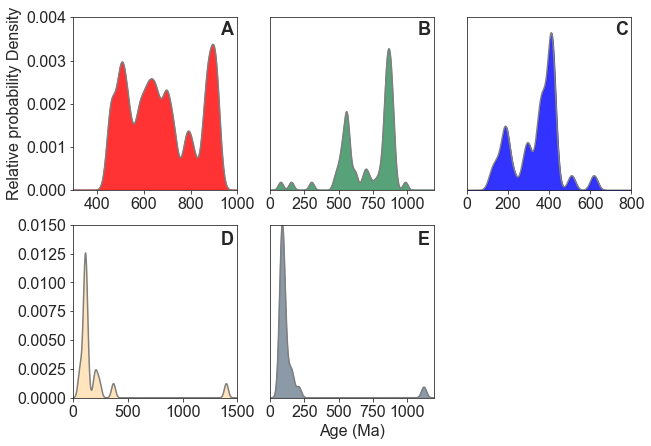

In [86]:
fig, ax = plt.subplots(2,3, figsize = (10, 7))
ax[0,0].plot(grid, y1, color = 'grey')
ax[0,0].fill(grid, y1, color = 'red', 
            alpha = 0.8)

ax[0,1].plot(grid, y2, color = 'grey')
ax[0,1].fill(grid, y2, color = 'seagreen', 
            alpha = 0.8)


ax[0,2].plot(grid, y3, color = 'grey')
ax[0,2].fill_between(grid, y3, color = 'blue', 
            alpha = 0.8)


ax[1,0].plot(grid, y4, color = 'grey')
ax[1,0].fill(grid, y4, color = 'navajowhite', 
            alpha = 0.8)


ax[1,1].plot(grid, y5, color = 'grey')
ax[1,1].fill(grid, y5, color = 'slategrey', 
            alpha = 0.8)


ax[1,1].set_xlabel('Age (Ma)')

ax[0,1].set_yticks([])
ax[0,2].set_yticks([])
ax[1,1].set_yticks([])


ax[0,0].set_xlim(300, 1200)
ax[0,1].set_xlim(0, 1800)
ax[0,2].set_xlim(0, 1800)
ax[1,0].set_xlim(0, 1800)
ax[1,1].set_xlim(0, 1300)

ax[0,0].locator_params(axis='x', nbins = 5)
ax[0,0].locator_params(axis='y', nbins = 7)
ax[0,1].locator_params(axis='x', nbins=5)
ax[0,2].locator_params(axis='x', nbins=5)
ax[1,0].locator_params(axis='x', nbins=5)
ax[1,0].locator_params(axis='y', nbins=7)
ax[1,1].locator_params(axis='x', nbins=5)

ax[0,0].set_ylim(0, 0.004)
ax[0,1].set_ylim(0, 0.008)
ax[0,2].set_ylim(0, 0.008)
ax[1,1].set_ylim(0, 0.015)
ax[1,0].set_ylim(0, 0.015)


ax[0,0].set_xlim(300, 1000)
ax[0,1].set_xlim(0, 1200)
ax[0,2].set_xlim(0, 800)
ax[1,0].set_xlim(0, 1500)
ax[1,1].set_xlim(0, 1200)

ax[0,0].set_ylabel('Relative probability Density')
fig.delaxes(ax[1,2])

s1 = 'A'
s2 = 'B'
s3 = 'C'
s4 = 'D'
s5 = 'E'
ax[0,0].text(930, 0.0036, s1, fontweight = 'bold', 
            fontsize= 18)

ax[0,1].text(1080, 0.0072, s2, fontweight = 'bold', 
            fontsize= 18)


ax[0,2].text(720, 0.0072, s3, fontweight = 'bold', 
            fontsize= 18)


ax[1,0].text(1344, 0.0133, s4, fontweight = 'bold', 
            fontsize= 18)


ax[1,1].text(1080, 0.0133, s5, fontweight = 'bold', 
            fontsize= 18)
plt.savefig('/Users/jackcarter/Desktop/chp3_figs/kdeplot_bm.pdf')

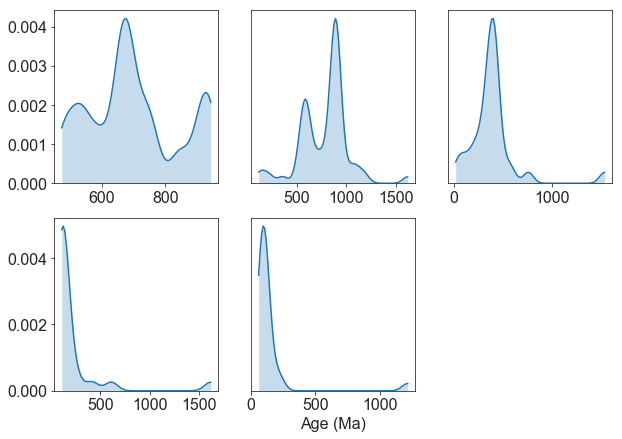

In [150]:
fig, ax = plt.subplots(2,3, figsize = (10, 7))
sns.kdeplot(age_mix1[age_mix1 >0], 
            shade = True, 
           bw = 0.2, 
           ax = ax[0,0])

sns.kdeplot(age_mix2, 
            shade = True, 
           bw = 0.2, 
           ax = ax[0,1])


sns.kdeplot(age_mix3, 
            shade = True, 
           bw = 0.2, 
           ax = ax[0,2])

sns.kdeplot(age_mix4, 
            shade = True, 
           bw = 0.2, 
           ax = ax[1,0])


sns.kdeplot(age_mix5, 
            shade = True, 
           bw = 0.2, 
           ax = ax[1,1])


ax[1,1].set_xlabel('Age (Ma)')

ax[0,1].set_yticks([])
ax[0,2].set_yticks([])
ax[1,1].set_yticks([])
fig.delaxes(ax[1,2])